## Домашняя работа #2.
Эта домашка про Фурье и немного про простейшие фильтры.

**Soft deadline: 02.03.2023 03:00:00 +0003 GMT**

**Hard deadline: 09.03.2023 03:00:00 +0003 GMT**

Ссылка на материалы: https://drive.google.com/drive/folders/1ZHo9MpdaOS1Qwc_F342wTByJNX0eHKmN?usp=sharing

In [ ]:
# ПРИМОНТИРУЙТЕ ДИСК К НОУТБУКУ
from google.colab import drive
drive.mount('/content/drive')


import numpy as np
import cv2 as cv
import copy

Mounted at /content/drive


In [ ]:
from pathlib import Path
import os
# ИЗМЕНИТЕ ЭТОТ ПУТЬ НА ТОТ, КУДА ВЫ ПОЛОЖИЛИ МАТЕРИАЛЫ КУРСА
sources_path = Path("/content/drive/MyDrive/Материалы/") 

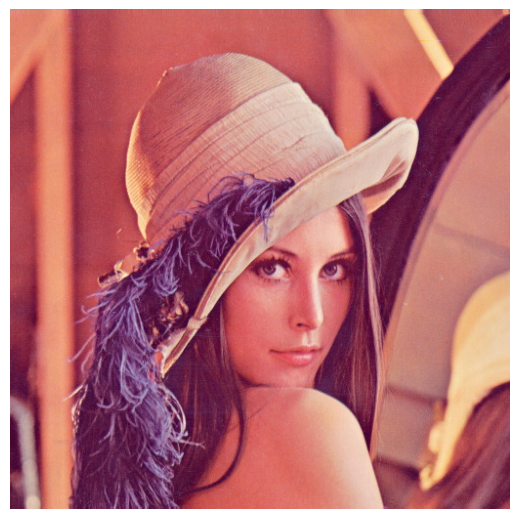

In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('default')

def pyplot(func):
    def make_pyplot_context(*args, **kwargs):
        plt.figure(figsize=(10, 5))
        ax = plt.axes([0,0,1,1], frameon=False)
        ax.set_axis_off()
        return func(*args, **kwargs)
    return make_pyplot_context

@pyplot
def show_bgr(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

@pyplot
def show_gray(img):
    plt.imshow(img, cmap='gray')

def mse(img1, img2):
    return ((img1.astype(int) - img2.astype(int)) ** 2).mean()

lena = cv2.imread(str(sources_path / "lena.jpg"))
show_bgr(lena)



**1. (5 баллов)**

Загрузите изображение $lena.jpg$ (512х512). Переведите изображение в градации серого. Произведите фильтрацию данного изображения в частотной области идеальным фильтром низких частот (фильтр, обрезающий все высокочастотные составляющие Фурье-образа, находящиеся на большем расстоянии от начала координат, чем некоторое заданное расстояние $D$), идеальным фильтром высоких частот (фильтр, обрезающий все низкокочастотные составляющие Фурье-образа, находящиеся на меньшем расстоянии от начала координат, чем некоторое заданное расстояние $D$) со следующими значениями радиуса фильтров:
1. 5
2. 15
3. 30
4. 255

Для каждого фильтра постройте состыкованное изображение из следующих: исходное изображение в градациях серого, изображение Фурье-спектра (после логарифмической коррекции для лучшей визуализации), изображение Фурье-спектра после фильтрации, изображение в пространственной области после фильтрации. На выходе должно получиться 8 изображений (4 параметра фильтров х 2 типа фильтров). Функции, которые Вам потребуются: $dft$, $mulSpectrums$, $idft$.

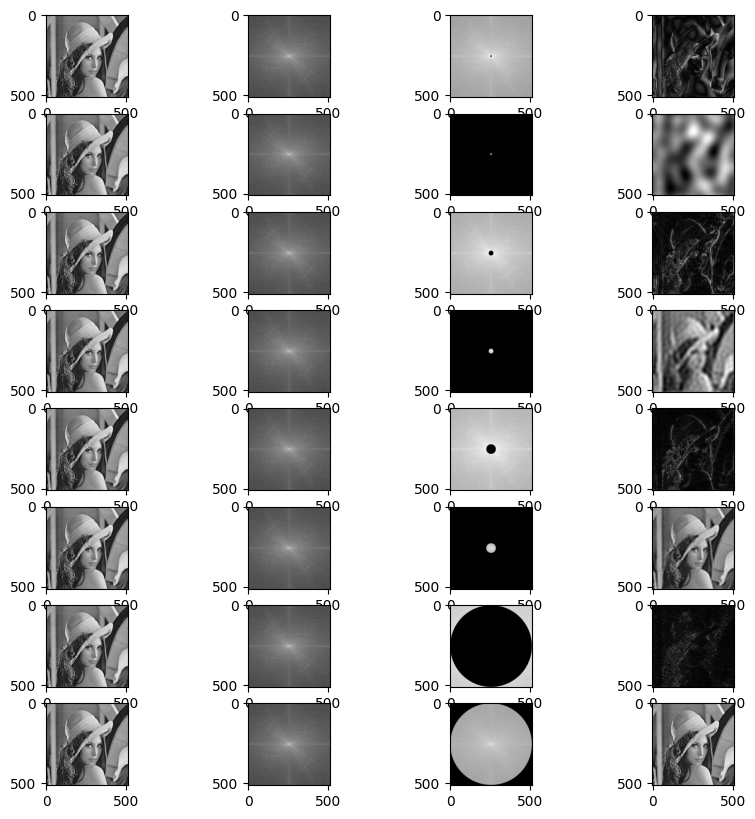

In [ ]:
img = copy.copy(lena)
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

img_fft = np.fft.fft2(np.float32(img))
img_fft_s = np.fft.fftshift(img_fft)
mag = 20 * np.log(np.abs(img_fft_s))

img_pos = []
for i in range(1, 33):
  img_pos.append((8,4, i))

rows = 2
img_pos = np.arange(1, 33)
D = [5, 15, 30, 255]
plt.figure(figsize=(10, 10))

for _ in range(4):
  lf_mask = cv2.circle(np.ones((img_fft_s.shape[0], img_fft_s.shape[1])), (img_fft_s.shape[0] // 2, img_fft_s.shape[1] // 2), D[_], (0, 0, 0), -1)
  hf_mask = cv2.circle(np.zeros((img_fft_s.shape[0], img_fft_s.shape[1])), (img_fft_s.shape[0] // 2, img_fft_s.shape[1] // 2), D[_], (255, 255 ,255), -1)

  lf_img_fft_masked_mag = 20 * np.log(np.abs(img_fft_s * lf_mask) + 1e-3)
  lf_img_fft_masked = np.fft.ifftshift(img_fft_s * lf_mask)
  lf_img_masked = np.fft.ifft2(lf_img_fft_masked)
  lf_img_masked = np.abs(lf_img_masked)


  hf_img_fft_masked_mag = 20 * np.log(np.abs(img_fft_s * hf_mask) + 1e-3)
  hf_img_fft_masked = np.fft.ifftshift(img_fft_s * hf_mask)
  hf_img_masked = np.fft.ifft2(hf_img_fft_masked)
  hf_img_masked = np.abs(hf_img_masked)

  plt.subplot(8, 4, img_pos[0 + _ * 8]), plt.imshow(img, cmap = 'gray')
  plt.subplot(8, 4, img_pos[1 + _ * 8]), plt.imshow(mag, cmap = 'gray')
  plt.subplot(8, 4, img_pos[2 + _ * 8]), plt.imshow(lf_img_fft_masked_mag, cmap = 'gray')
  plt.subplot(8, 4, img_pos[3 + _ * 8]), plt.imshow(lf_img_masked, cmap = 'gray')
  plt.subplot(8, 4, img_pos[4 + _ * 8]), plt.imshow(img, cmap = 'gray')
  plt.subplot(8, 4, img_pos[5 + _ * 8]), plt.imshow(mag, cmap = 'gray')
  plt.subplot(8, 4, img_pos[6 + _ * 8]), plt.imshow(hf_img_fft_masked_mag, cmap = 'gray')
  plt.subplot(8, 4, img_pos[7 + _ * 8]), plt.imshow(hf_img_masked, cmap = 'gray')

**2. (5 баллов)**

Удалите диагональные полоски с изображения $lena\_diagonal.jpg$. Вычислите среднеквадратичную ошибку (mean squared error, $MSE$, \url{http://en.wikipedia.org/wiki/Mean_squared_error}) для полученного результата и изображения $lena\_gray\_512.tif$. Задача будет засчитана при $MSE < 1500$.

3484.66450881958


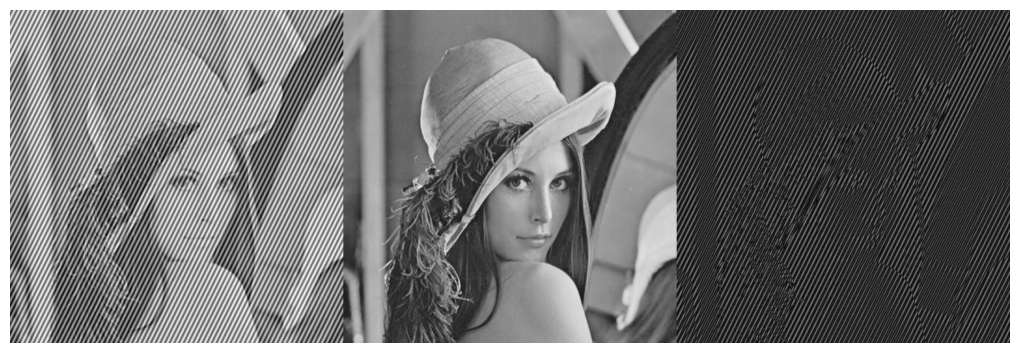

In [ ]:
lena_diag = cv2.imread(str(sources_path / "lena_diagonal.jpg"), 0)
lena_gray_fix = cv2.imread(str(sources_path / "lena_gray_512.tif"), 0)
print(mse(lena_diag, lena_gray_fix))
show_gray(np.hstack([lena_diag.astype(int), lena_gray_fix.astype(int), np.abs(lena_diag.astype(int) - lena_gray_fix.astype(int))]))

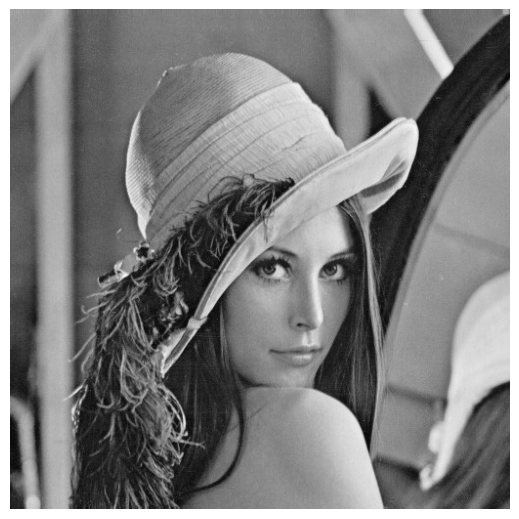

In [ ]:
img = copy.copy(lena)
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

show_gray(img)

[185 327]
[220 221 252 253 254 255 256 257 258 259 260 291 292]
917.331169128418 MSE


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fd07d5e2c70>)

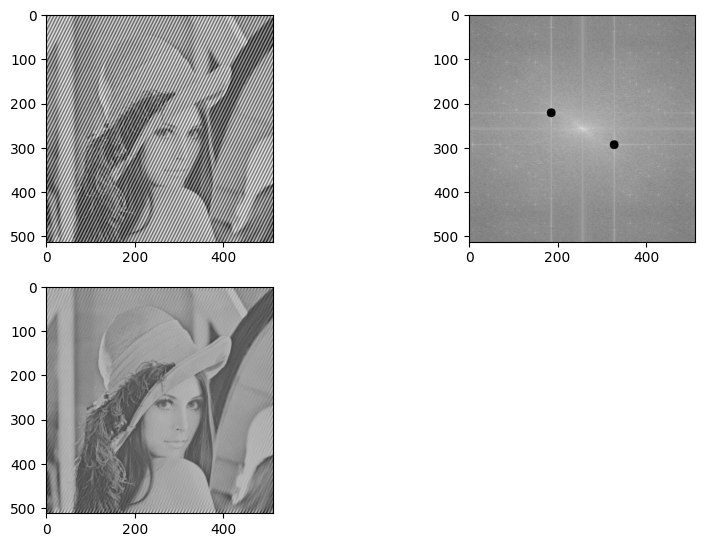

In [ ]:
plt.figure(figsize=(10, 10))

lena2 = copy.copy(lena_diag)
plt.subplot(321), plt.imshow(lena2, 'gray')

img_fft = np.fft.fft2(lena2)
img_shift_s = np.fft.fftshift(img_fft)
mag = np.log2(np.abs(img_shift_s) + 1e-3)

cc = np.mean(mag, axis=1)
rc = np.mean(mag, axis=0)

threshold_rc = (np.max(rc) - np.mean(rc)) * 0.7 + np.mean(rc)
threshold_cc = (np.max(cc) - np.mean(cc)) * 0.7 + np.mean(cc)
indices_rc = np.argwhere(rc > threshold_rc).flatten()
indices_cc = np.argwhere(cc > threshold_cc).flatten()
print(indices_rc)
print(indices_cc)

m1 = cv2.circle(np.ones((img_fft_s.shape[0], img_fft_s.shape[1])), (indices_rc[0], indices_cc[0]), 10, (0, 0, 0), -1)
m2 = cv2.circle(np.ones((img_fft_s.shape[0], img_fft_s.shape[1])), (indices_rc[-1], indices_cc[-1]), 10, (0, 0, 0), -1)

mag_shw = 20 * np.log(np.abs(img_shift_s * m1 * m2) + 1e-3)
plt.subplot(322), plt.imshow(mag_shw, 'gray')

hf_img_fft_masked = np.fft.ifftshift(img_shift_s * m1 * m2)
hf_img_masked = np.fft.ifft2(hf_img_fft_masked)
hf_img_masked = np.abs(hf_img_masked)
print(mse(img, hf_img_masked), 'MSE')
plt.subplot(323), plt.imshow(hf_img_masked, 'gray')

**3. (10 баллов)**

Теперь предложите решение, которое бы работало для любого шума подобной природы. (синусоида некотрой частоты под некоторым углом) Смоделируйте изображение с шумом и предложите универсальный алгоритм, который решит задачу. 
Тот, у кого по результатам проверки будет наименьшее значение MSE для предлженной картинки, получит призовую шоколадку (раньше мы раздавали призовые баллы, но теперь у нас концепция фиксированного максимального количества баллов)
Учтите, что помимо синусоидального шума, могут быть применены другие преобразования яркости.

---

Уточнение того, что требуется сделать:

* написать параметризованный генератор шума, которому можно задать произвольный угол, частоту полос и силу перекрытия, и получить шум с заданными параметрами

* усовершенствовать алгоритм из второй задачи, чтобы он работал на произвольных параметрах шума; тут полезно сделать интерактивный виджет, с помощью которого можно менять параметры шума и смотреть как справляется с ним алгоритм; интерактивный виджет проще всего сделать так:

    ```python
    from ipywidgets import interact

    @interact(angle=(0, 360, 1), freq=(1, 64, 1))
    def anim_general_solution(angle=45, freq=32):
        # visualization code here
    ```

* после обобщенным алгоритмом отчистить изображение из задачи 2 и посчитать MSE с чистым изображением, по этому MSE и будет конкурс за призовую шоколадку

**4. (5 баллов)**

Подавите шум на изображении $lena\_color\_512\_noise.tif$. Вычислите среднеквадратичную ошибку ($MSE$) для полученного результата и изображения $lena\_color\_512.tif$. Задача будет засчитана при $MSE < 150$. Тот, у кого по результатам проверки будет наименьшее значение $MSE$ среди всех студентов для этой задачи, получит призовую шоколадку.

2184.1810162862143


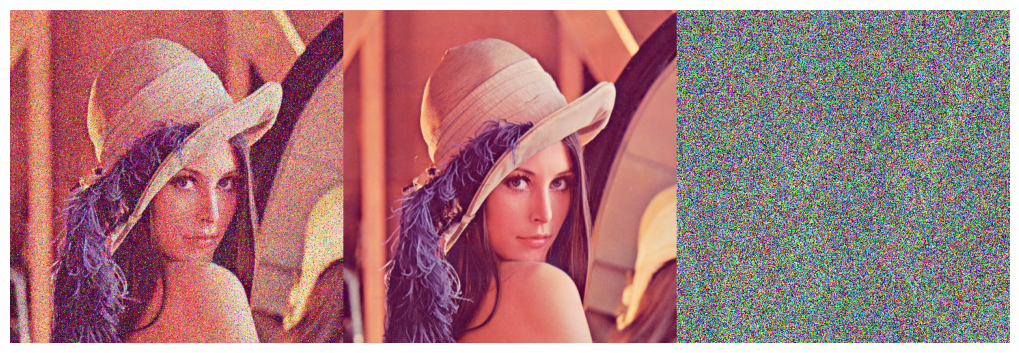

In [ ]:
img_noised = cv2.imread(str(sources_path / "lena_color_512-noise.tif"))
img_colored = cv2.imread(str(sources_path / "lena_color_512.tif"))

print(mse(img_noised, img_colored))
show_bgr(np.hstack([img_noised, img_colored, np.abs(img_noised - img_colored)]))

In [ ]:
img_noised.shape

(512, 512, 3)

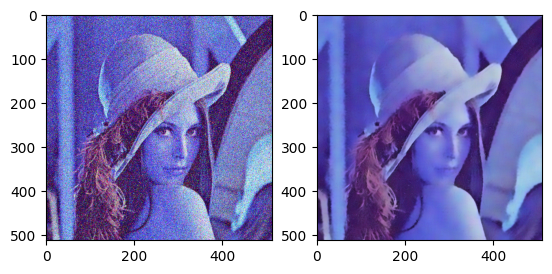

149.54560216267905


In [ ]:
# Reading image from folder where it is stored
img = np.asarray(copy.copy(img_noised), dtype=np.uint8)
# denoising of image saving it into dst image
noiseless_image_colored = cv2.fastNlMeansDenoisingColored(img,None,27,27,5,19)
  
# Plotting of source and destination image
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(noiseless_image_colored)
  
plt.show()

print(mse(img_colored, noiseless_image_colored)) # 149.545

**5. (5 баллов)**

Выделите границы на изображении **cat.jpg**:

* при помощи градиента и фильтров собеля
* при помощи лапласиана
* используя алгоритм $canny$

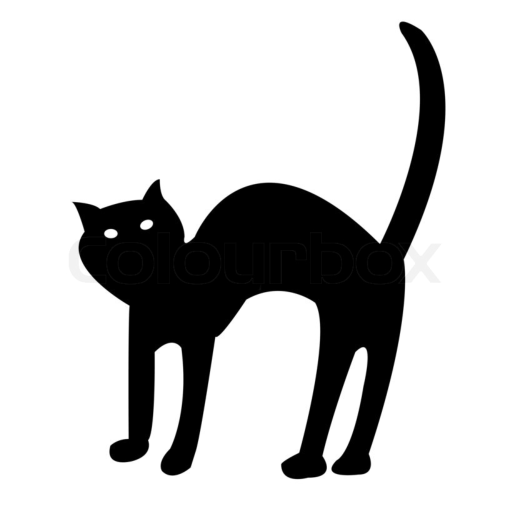

In [ ]:
from scipy.signal import convolve2d
img = cv2.imread(str(sources_path / "cat.jpg"), 0)
show_gray(img)
cat = copy.copy(img)

In [ ]:
# to speed up the process

cat_resized = cv2.resize(cat, (150, 150))
# plt.imshow(cat_resized, 'gray')
cat_resized.shape

(150, 150)

<ipython-input-21-9b069ecf4465>:12: RuntimeWarning: divide by zero encountered in true_divide
  theta = np.arctan(gy / gx)
<ipython-input-21-9b069ecf4465>:12: RuntimeWarning: invalid value encountered in true_divide
  theta = np.arctan(gy / gx)


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fd07ec0edc0>)

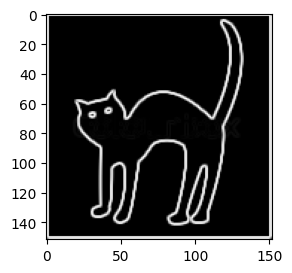

In [ ]:
# Градиент and sobel
y = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]])

x = y.T

gx = convolve2d(x, cat_resized)
gy = convolve2d(y, cat_resized)

mag = np.sqrt(gx ** 2 + gy ** 2)
theta = np.arctan(gy / gx)
plt.subplot(121), plt.imshow(mag, 'gray')
# plt.subplot(122), plt.imshow(theta, 'gray')

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fd08a43d400>)

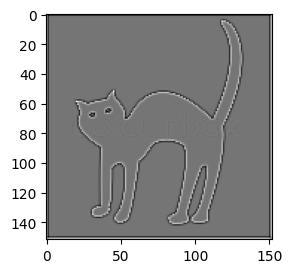

In [ ]:
# Лаплассиан
l = np.ones((3, 3)); l[1][1] = -8
gx = convolve2d(l, cat_resized)
plt.subplot(121), plt.imshow(gx, 'gray')

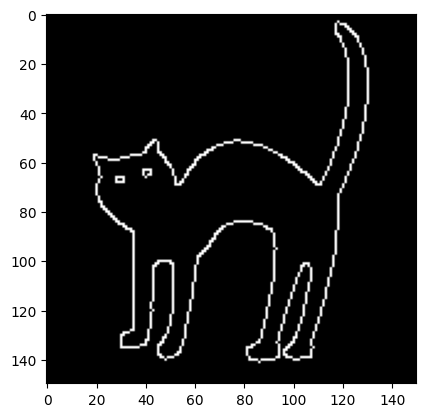

In [ ]:
# canny
edges = cv.Canny(cat_resized,100,200)
plt.imshow(edges, 'gray')